# クロスハッチパターンの作成
まずは、非常に汎用性の高い内部関数を作る。
次に、使用方法を制限した外部公開用の関数を作る。

In [6]:
# コアとなる関数の動作確認
# -------------------------
%matplotlib inline
import cv2
import check_test_pattern as ctp
import test_pattern_generator as tpg
import imp
imp.reload(ctp)
imp.reload(tpg)

dummy = tpg.make_crosshatch(width=1920, height=1080,
                    linewidth=1, linetype=cv2.LINE_AA,
                    fragment_width=64, fragment_height=64,
                    bg_color=tpg.const_black, fg_color=tpg.const_white,
                    angle=30, debug=True)

In [7]:
# 汎用性の低いやつ
# -------------------------
%matplotlib inline
import cv2
import check_test_pattern as ctp
import test_pattern_generator as tpg
import imp
imp.reload(ctp)
imp.reload(tpg)

dummy = tpg.make_multi_crosshatch(width=1920, height=1080,
                          h_block=4, v_block=2,
                          fragment_width=64, fragment_height=64,
                          linewidth=1, linetype=cv2.LINE_AA,
                          bg_color_array=tpg.const_gray_array_lower,
                          fg_color_array=tpg.const_white_array,
                          angle=30, debug=True)

In [5]:
# 更に汎用性を低くした
# -------------------------
%matplotlib inline
import cv2
import check_test_pattern as ctp
import test_pattern_generator as tpg
import imp
imp.reload(ctp)
imp.reload(tpg)
ctp.make_rgbk_crosshatch(debug=True)

ValueError: order parameter is invalid

# リファクタリング

前回作ったパターンは、横が 4096固定であり、3840 とか 1920とかで作れなかった。これを改良する。
基本的には、固定幅だったのを ```equal_division()``` で置き換えるだけで良いはず…？

In [3]:
import test_pattern_generator as tpg
import imp
imp.reload(tpg)

# 普通の8分割。これだと小数点が出る。
a = tpg.get_color_array(order='decrement', color=[0, 1, 0],
                        min=0, max=255, div_num=8)
print(a)

# 8分割。整数値となるよう、endpoint=False にした。
b = tpg.get_color_array(order='decrement', color=[0, 1, 0],
                        min=0, max=256, div_num=8, endpoint=False)
print(b)

# 普通の8分割。これだと小数点が出る。
c = tpg.get_color_array(order='increment', color=[0, 1, 0],
                        min=0, max=255, div_num=8)
print(c)

# 8分割。整数値となるよう、endpoint=False にした。
d = tpg.get_color_array(order='increment', color=[0, 1, 0],
                        min=0, max=256, div_num=8, endpoint=False)
print(d)


[[ 0.          1.          0.        ]
 [ 0.          0.85714286  0.        ]
 [ 0.          0.71428571  0.        ]
 [ 0.          0.57142857  0.        ]
 [ 0.          0.42857143  0.        ]
 [ 0.          0.28571429  0.        ]
 [ 0.          0.14285714  0.        ]
 [ 0.          0.          0.        ]]
[[ 0.     1.     0.   ]
 [ 0.     0.875  0.   ]
 [ 0.     0.75   0.   ]
 [ 0.     0.625  0.   ]
 [ 0.     0.5    0.   ]
 [ 0.     0.375  0.   ]
 [ 0.     0.25   0.   ]
 [ 0.     0.125  0.   ]]
[[ 0.          0.          0.        ]
 [ 0.          0.14285714  0.        ]
 [ 0.          0.28571429  0.        ]
 [ 0.          0.42857143  0.        ]
 [ 0.          0.57142857  0.        ]
 [ 0.          0.71428571  0.        ]
 [ 0.          0.85714286  0.        ]
 [ 0.          1.          0.        ]]
[[ 0.     0.125  0.   ]
 [ 0.     0.25   0.   ]
 [ 0.     0.375  0.   ]
 [ 0.     0.5    0.   ]
 [ 0.     0.625  0.   ]
 [ 0.     0.75   0.   ]
 [ 0.     0.875  0.   ]
 [ 0.     1. 

Noto Sans CJK JP is found


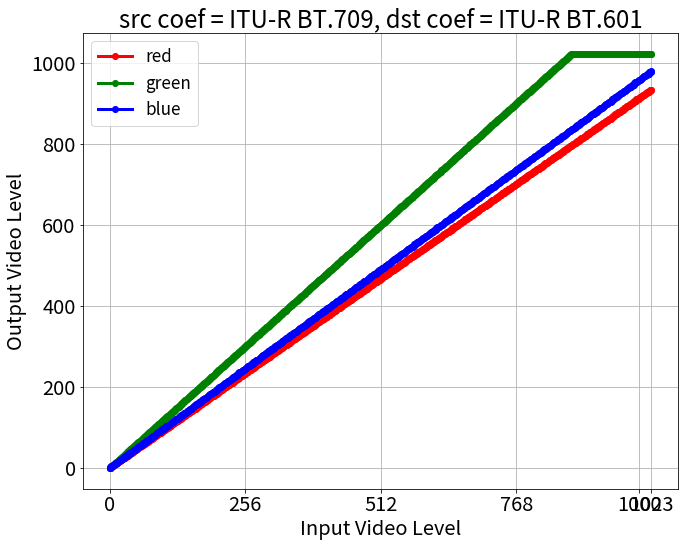

Noto Sans CJK JP is found


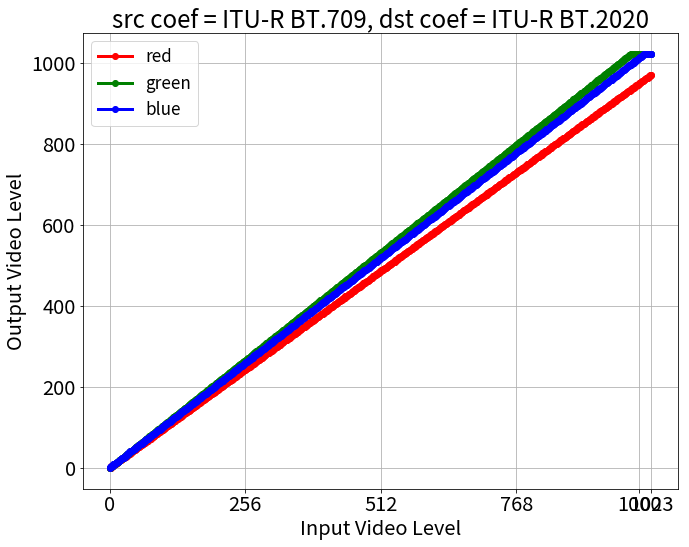

Noto Sans CJK JP is found


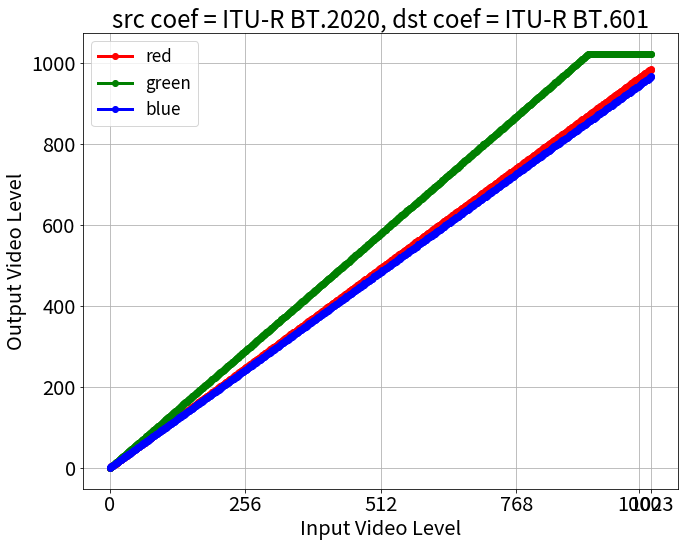

Noto Sans CJK JP is found


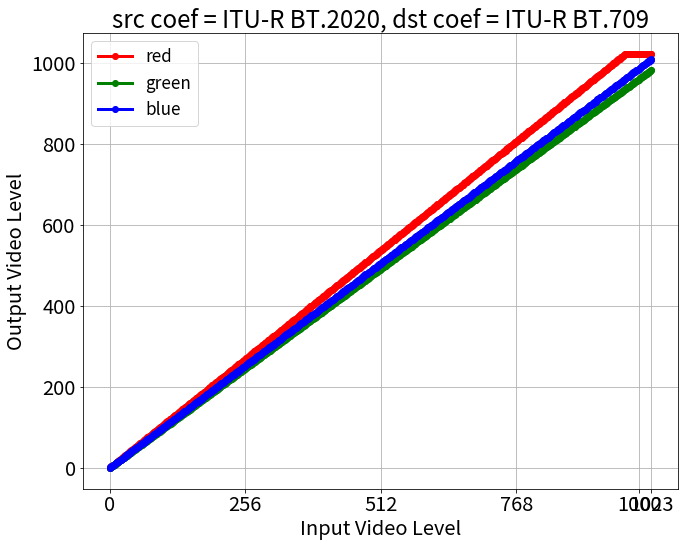

In [9]:
%matplotlib inline
import imp
import gamut_test_pattern as gtp
imp.reload(gtp)
gtp._check_clip_level(src='ITU-R BT.709', dst='ITU-R BT.601')
gtp._check_clip_level(src='ITU-R BT.709', dst='ITU-R BT.2020')
gtp._check_clip_level(src='ITU-R BT.2020', dst='ITU-R BT.601')
gtp._check_clip_level(src='ITU-R BT.2020', dst='ITU-R BT.709')

Noto Sans CJK JP is found


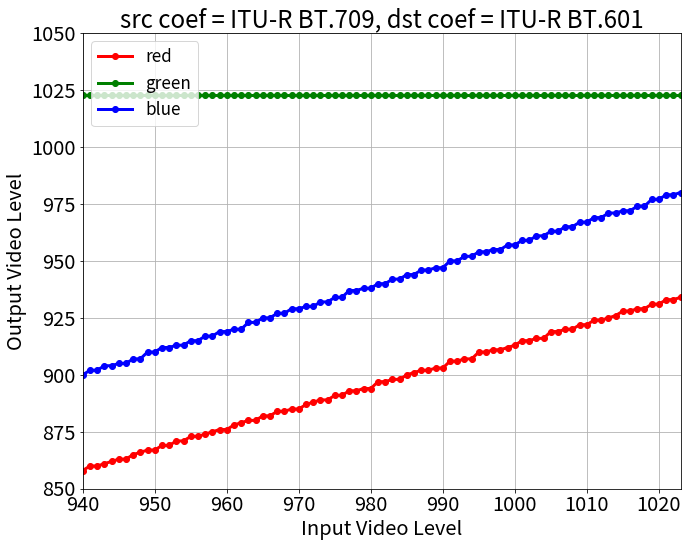

Noto Sans CJK JP is found


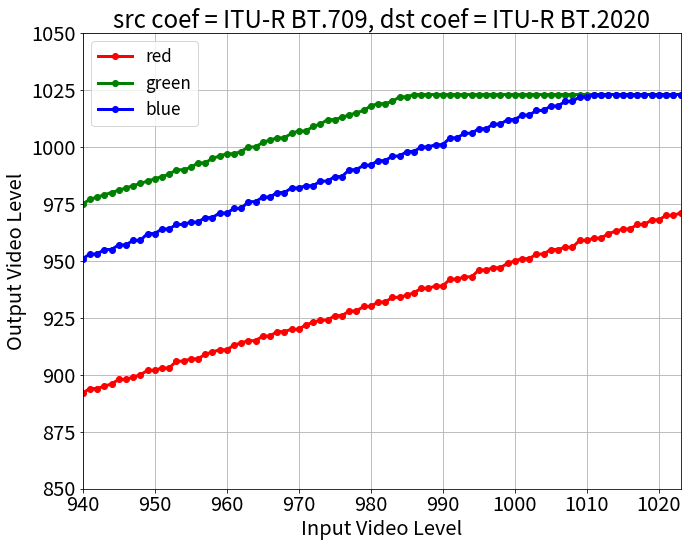

Noto Sans CJK JP is found


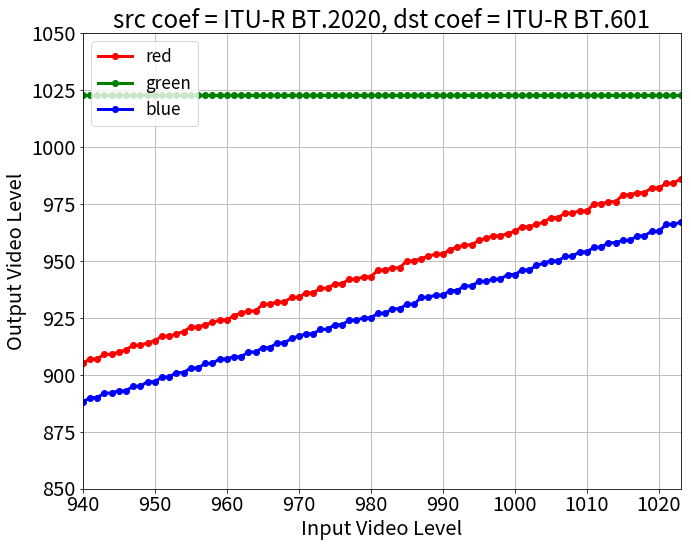

Noto Sans CJK JP is found


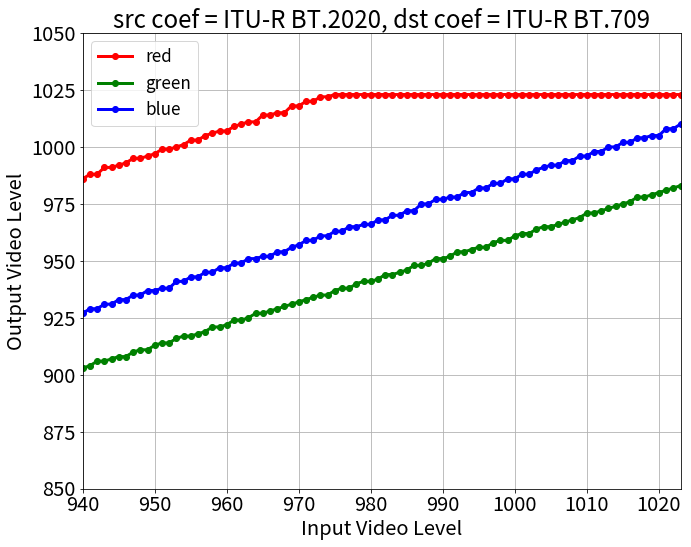

In [8]:
%matplotlib inline
import imp
import gamut_test_pattern as gtp
imp.reload(gtp)
gtp._check_clip_level(src='ITU-R BT.709', dst='ITU-R BT.601')
gtp._check_clip_level(src='ITU-R BT.709', dst='ITU-R BT.2020')
gtp._check_clip_level(src='ITU-R BT.2020', dst='ITU-R BT.601')
gtp._check_clip_level(src='ITU-R BT.2020', dst='ITU-R BT.709')